In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [15]:
Stock_Market = { 'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017],
                'Month':[12,11,10,9,8,7,6,5,4,3,2,1],
    'Interest_Rate':[2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5],
                'Unemployment_Rate':[5.3,5.3,5.3,5.3,5.4,5.6,5.3,5.3,5.3,5.3,5.4,5.6],
                'Stock_Index_Price':[1464,1394,1357,1293,1256,1254,1253,1394,1357,1293,1256,1254]
    
}

In [16]:
df=pd.DataFrame(Stock_Market)

In [17]:
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


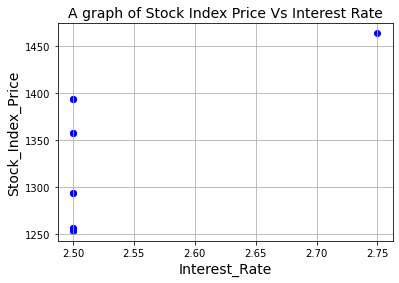

In [32]:
plt.scatter(df[ 'Interest_Rate'],df['Stock_Index_Price'],color="blue")
plt.title("A graph of Stock Index Price Vs Interest Rate",fontsize=14)
plt.xlabel('Interest_Rate',fontsize=14)
plt.ylabel('Stock_Index_Price',fontsize=14)
plt.grid(True)
plt.show()

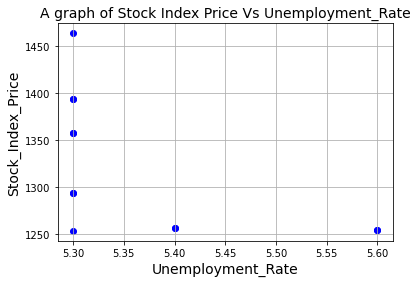

In [33]:
plt.scatter(df[ 'Unemployment_Rate'],df['Stock_Index_Price'],color="blue")
plt.title("A graph of Stock Index Price Vs Unemployment_Rate",fontsize=14)
plt.xlabel('Unemployment_Rate',fontsize=14)
plt.ylabel('Stock_Index_Price',fontsize=14)
plt.grid(True)
plt.show()

In [36]:
df.corr()#correlation

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
Year,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,0.480384,-0.393042,0.570863
Interest_Rate,NaN,0.480384,1.000000,-0.181818,0.634003
Unemployment_Rate,NaN,-0.393042,-0.181818,1.000000,-0.560891
Stock_Index_Price,NaN,0.570863,0.634003,-0.560891,1.000000


In [50]:
# 'Interest_Rate has a positive correlation to the Stock_Index_Price while Unemployment_Rate# 'Interest_Rate has a negative correlation to the Stock_Index_Price
x=df[['Interest_Rate','Unemployment_Rate']]
# 'Interest_Rate & Unemployment_Rate are the independent variables since they affect the stock index pricce
# stock index price is the target to be predicted(dependent variables) thus acquiring variable y
y=df['Stock_Index_Price']

In [51]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(x,y)
# fit() method takes the training data as arguments, which can be one array in the case of unsupervised learning,
# or two arrays in the case of supervised learning. Note that the model is fitted using X and y
# , but the object holds no reference to X and y .

LinearRegression()

In [52]:
print("intercept",regr.intercept_)
print("intercept",regr.coef_)
# there will be only one y intercept 
#Since we have two independent variables there will be two coefficents  

intercept 1477.487179487184
intercept [ 550.05128205 -287.94871795]


In [53]:
New_Interest_Rate=2.75
New_Unemployment_Rate=5.3
regr.predict([[New_Interest_Rate,New_Unemployment_Rate]])

array([1464.])

In [61]:
x=df[['Interest_Rate','Unemployment_Rate']]
y=df['Stock_Index_Price']
model=(smf.ols(formula ="y ~ x",data=df)).fit()
predictions=model.predict(x)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     6.960
Date:                Tue, 02 Nov 2021   Prob (F-statistic):             0.0149
Time:                        16:47:21   Log-Likelihood:                -62.241
No. Observations:                  12   AIC:                             130.5
Df Residuals:                       9   BIC:                             131.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1477.4872    965.805      1.530      0.1

C:\Users\VICKFURY\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
